In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict


## JOINT ANGLE DATA
#orig action space
#sim_data = {'joint0_direction_1_true10': 0.11892182948681558, 'joint5_direction_1_true10': 0.23920723012990983, 'joint3_direction_0_true10': 0.19991827012742402, 'joint2_direction_1_true10': 0.200031445057021, 'joint1_direction_1_true10': 0.097246170581307245, 'joint0_direction_0_true10': 0.11878746664305258, 'joint6_direction_0_true10': 0.23996161828035559, 'joint6_direction_1_true10': 0.23996161055065132, 'joint2_direction_0_true10': 0.19905835722225998, 'joint4_direction_0_true10': 0.23711163130562357, 'joint4_direction_1_true10': 0.23711785450672621, 'joint1_direction_0_true10': 0.13531498794129745, 'joint5_direction_0_true10': 0.23921278142450877, 'joint3_direction_1_true10': 0.1985057932069263}
#tuned action space
#sim_data = {'joint3_direction_1_true10': 0.1985057932069263, 'joint6_direction_1_true10': 0.23996161055065132, 'joint1_direction_0_true10': 0.040503767977465022, 'joint5_direction_0_true10': 0.19136974565509046, 'joint4_direction_0_true10': 0.35566732164929776, 'joint4_direction_1_true10': 0.35568294302596132, 'joint0_direction_1_true10': 0.071355374524119733, 'joint5_direction_1_true10': 0.19136611599350895, 'joint0_direction_0_true10': 0.071306775789042168, 'joint2_direction_0_true10': 0.15932853884691875, 'joint6_direction_0_true10': 0.23996161828035559, 'joint1_direction_1_true10': 0.040417699524493034, 'joint3_direction_0_true10': 0.19991827012742402, 'joint2_direction_1_true10': 0.1599519871004596}
# [-5, 5] action space
sim_data = {'joint5_direction_1_true10': 0.11960417968451856, 'joint5_direction_0_true10': 0.11960563033578139, 'joint3_direction_0_true10': 0.099760330836446753, 'joint4_direction_0_true10': 0.11855599309896769, 'joint0_direction_0_true10': 0.059428295347984814, 'joint1_direction_1_true10': 0.067312301480338621, 'joint6_direction_1_true10': 0.11998080596595355, 'joint2_direction_0_true10': 0.099656123476283123, 'joint4_direction_1_true10': 0.11855743877241502, 'joint2_direction_1_true10': 0.099899940769306889, 'joint6_direction_0_true10': 0.11998080793048535, 'joint0_direction_1_true10': 0.059462071752434342, 'joint3_direction_1_true10': 0.099405911660414015, 'joint1_direction_0_true10': 0.067551297934968835}
#real_data = {'joint6_direction_1_true2.25': -0.1117209929972887, 'joint1_direction_1_true1.875': -0.005793845653533936, 'joint4_direction_0_true2.25': 0.08229072447866201, 'joint1_direction_0_true1.875': 0.012440407276153564, 'joint3_direction_0_true3.75': 0.05540769100189209, 'joint0_direction_1_true2.625': -0.015602343901991843, 'joint0_direction_0_true2.625': 0.020290527597535402, 'joint6_direction_0_true2.25': 0.11847753860056401, 'joint4_direction_1_true2.25': -0.09064892455935478, 'joint2_direction_1_true3.75': -0.04573671817779541, 'joint3_direction_1_true3.75': -0.027840614318847656, 'joint2_direction_0_true3.75': 0.05435537174344063, 'joint5_direction_1_true1.5': -0.03956289291381836, 'joint5_direction_0_true1.5': 0.07845984697341919}


## EE POSITION DATA
# original [-10, 10] action scale
#sim_data = {'joint2_direction_0_true': 0.0078281349715010884, 'joint2_direction_1_true': 0.024524459502010772, 'joint6_direction_0_true': 0.0024185040876303935, 'joint3_direction_0_true': 0.0020251448253714166, 'joint0_direction_1_true': 0.03141700175497944, 'joint5_direction_1_true': 0.031233004877620069, 'joint0_direction_0_true': 0.01942466132833702, 'joint4_direction_0_true': 0.0018196335582636655, 'joint4_direction_1_true': 0.017827395298866858, 'joint1_direction_1_true': 0.035954622621016355, 'joint1_direction_0_true': 0.047213074441729543, 'joint3_direction_1_true': 0.048655327921635891, 'joint6_direction_1_true': 0.0023425437976096696, 'joint5_direction_0_true': 0.0066420094530888416}
#tuned action scale
#sim_data = {'joint0_direction_0_true10': 0.033011069262635195, 'joint3_direction_0_true10': 0.098387564012513279, 'joint2_direction_1_true10': 0.065535706057880269, 'joint4_direction_1_true10': 0.054337373321976391, 'joint5_direction_0_true10': 0.036622102022209516, 'joint6_direction_1_true10': 8.878580307642117e-05, 'joint1_direction_1_true10': 0.020008756030648993, 'joint2_direction_0_true10': 0.067038780094077918, 'joint1_direction_0_true10': 0.020110419612641008, 'joint0_direction_1_true10': 0.033130515398571099, 'joint5_direction_1_true10': 0.037067981442894346, 'joint3_direction_1_true10': 0.10167209085698262, 'joint4_direction_0_true10': 0.053548646188672291, 'joint6_direction_0_true10': 9.8656981780135324e-05}
#sim_data = {'joint5_direction_0_true10': 0.045669254580502638, 'joint3_direction_1_true10': 0.10167209085698262, 'joint4_direction_0_true10': 0.035901060239908814, 'joint0_direction_0_true10': 0.054945644124244353, 'joint3_direction_0_true10': 0.098387564012513279, 'joint2_direction_0_true10': 0.084015702785703111, 'joint5_direction_1_true10': 0.04636299952990787, 'joint1_direction_1_true10': 0.044835658894748782, 'joint0_direction_1_true10': 0.055277435770199237, 'joint6_direction_0_true10': 9.8656981780135324e-05, 'joint6_direction_1_true10': 8.878580307642117e-05, 'joint2_direction_1_true10': 0.081672637798673758, 'joint1_direction_0_true10': 0.06742576242460116, 'joint4_direction_1_true10': 0.036252382414301454}
# real data from robot 
#real_data = {'joint0_direction_0_true2.625': 0.03552098279590733, 'joint1_direction_1_true1.875': 0.008881036273732431, 'joint2_direction_1_true3.75': 0.05714817829666299, 'joint3_direction_1_true3.75': 0.053016762935346726, 'joint1_direction_0_true1.875': 0.020212687982871617, 'joint2_direction_0_true3.75': 0.07618756781420202, 'joint4_direction_1_true2.25': 0.05407977771316831, 'joint6_direction_1_true2.25': 0.0024313296006860906, 'joint3_direction_0_true3.75': 0.09636241918714186, 'joint0_direction_1_true2.625': 0.0238604340152198, 'joint5_direction_1_true1.5': 0.015129994652287801, 'joint5_direction_0_true1.5': 0.0390272451274138, 'joint4_direction_0_true2.25': 0.03772069379817248, 'joint6_direction_0_true2.25': 0.002517161069410529}

In [82]:
# order the joints and make keys match between sim and real
sim_ordered = OrderedDict()
real_ordered = OrderedDict()
for k in sorted(sim_data.keys()):
    short_k = k[:-7]
    real_k = [j for j in real_data.keys() if short_k in j][0]
    sim_ordered[short_k] = sim_data[k]
    real_ordered[short_k] = real_data[real_k]
    
for k,v in real_ordered.items():
    real_ordered[k] = np.abs(v)

([<matplotlib.axis.XTick at 0x7f5de7cae240>,
 <a list of 14 Text xticklabel objects>)

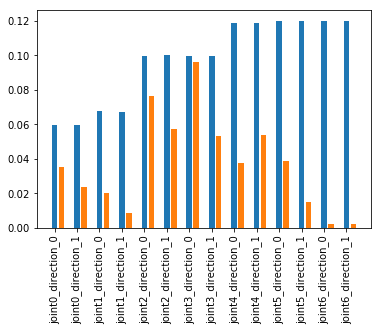

In [83]:
# make x-coords so that sim and real can be plotted side by side
num_data = len(sim_ordered.keys()) * 3
sim_x = list(np.linspace(num_data, 0, 14))
sim_x.reverse()
real_x = np.array(sim_x) + 1

# do the plotting (sim is blue, real is orange)
plt.bar(sim_x, list(sim_ordered.values()))
plt.bar(real_x, list(real_ordered.values()))
plt.xticks(sim_x, list(sim_ordered.keys()), rotation='vertical')